# <mark>Pillow</mark>

## **Configuração Inicial**

In [ ]:
!pip install pillow

In [21]:
from PIL import Image, ImageFilter, ImageEnhance, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

## **Primeiros Passos**

In [27]:
path = "/content/0_0.png"

In [60]:
image = Image.open(path)

In [61]:
image

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
image.size

In [ ]:
#plt.imshow(image)
#plt.axis()#'off'
#plt.show()
image

 ## **Modos (`mode`) do PIL** ##


Cada imagem aberta com o PIL possui um **modo**, indicando como as cores são armazenadas na imagem:

| Modo   | Explicação                                              | Exemplo                   |
|--------|---------------------------------------------------------|---------------------------|
| **1**    | Binário (preto e branco puro, apenas 0 e 1)          | `img.convert('1')`         |
| **L**    | Escala de cinza (256 níveis, 0 preto a 255 branco)   | `img.convert('L')`         |
| **P**    | Paleta de cores indexadas (até 256 cores)            | `img.convert('P')`         |
| **RGB**  | Cores verdadeiras (16,7 milhões de cores)            | `img.convert('RGB')`       |
| **RGBA** | RGB com canal Alpha (transparência)                  | `img.convert('RGBA')`      |
| **CMYK** | Cyan, Magenta, Yellow, Key (preto), comum na impressão | `img.convert('CMYK')`      |
| **YCbCr**| Modelo de cor usado para vídeo digital               | `img.convert('YCbCr')`     |
| **LAB**  | Modelo baseado em percepção visual humana            | `img.convert('LAB')`       |
| **HSV**  | Hue, Saturation, Value                               | `img.convert('HSV')`       |
| **P** (palette)| Paleta de cores limitada (256 cores definidas) | `img.convert('P')`         |

---
**Exemplo prático de cada `mode`:**

```python
img_binary = img.convert('1')  # Binário
img_gray = img.convert('L')    # Cinza
img_rgb = img.convert('RGB')   # RGB colorido
img_rgba = img.convert('RGBA') # RGB com transparência
img_cmyk = img.convert('CMYK') # Para impressão gráfica
img_ycbcr = img.convert('YCbCr')  # Vídeo digital
```

In [ ]:
img_gray = image.convert('L')

## **Editando: tamanho, rotação e recorte**

In [64]:
img_resized = image.resize((300, 300))  # largura x altura

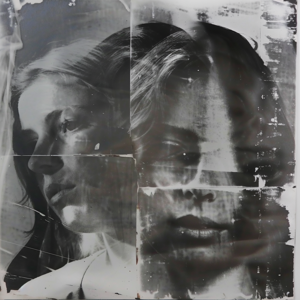

In [65]:
img_resized

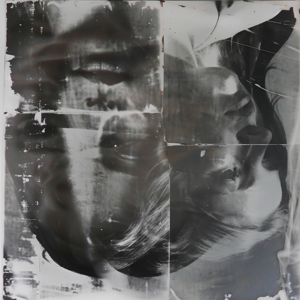

In [66]:
img_rotated = img_resized.rotate(180)  # rotação em graus
img_rotated

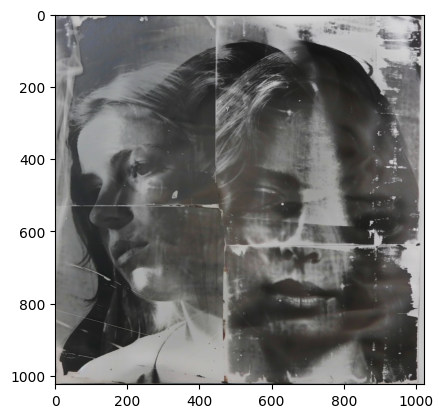

In [67]:
plt.imshow(image)
plt.axis()#'off'
plt.show()

In [80]:
# (left, upper, right, lower)
img_cropped = image.crop((50, 200, 400, 500))

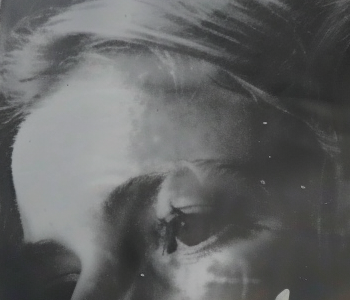

In [81]:
img_cropped

## **Filtros**


---
 **Principais tipos de filtros (`ImageFilter.Type`):**

| Filtro PIL                  | Uso prático / descrição                                 |
|-----------------------------|---------------------------------------------------------|
| `ImageFilter.BLUR`          | Desfoque simples                                        |
| `ImageFilter.CONTOUR`       | Destaca contornos                                       |
| `ImageFilter.DETAIL`        | Melhora sutilezas nos detalhes                          |
| `ImageFilter.EDGE_ENHANCE`  | Realça contornos e bordas                              |
| `ImageFilter.EDGE_ENHANCE_MORE` | Realça ainda mais as bordas                           |
| `ImageFilter.EMBOSS`        | Efeito de relevo                                        |
| `ImageFilter.FIND_EDGES`    | Detecta e destaca contornos                             |
| `ImageFilter.SHARPEN`       | Nitidez (realça detalhes finos)                         |
| `ImageFilter.SMOOTH`        | Suavização leve (reduz ruído levemente)                 |
| `ImageFilter.SMOOTH_MORE`   | Suavização mais intensa                                 |
| `ImageFilter.GaussianBlur(radius)`| Desfoque Gaussiano com controle de intensidade       |
| `ImageFilter.UnsharpMask`   | Aumenta nitidez por meio da máscara de nitidez          |
| `ImageFilter.MinFilter`     | Redução de ruído usando mínimo (erosão)                 |
| `ImageFilter.MaxFilter`     | Redução de ruído usando máximo (dilatação)              |
| `ImageFilter.ModeFilter`    | Redução de ruído por moda (mais comum)                  |
| `ImageFilter.MedianFilter`  | Filtro mediano para redução de ruído                    |
| `ImageFilter.SMOOTH_MORE`   | Desfoque suave mais intenso                             |
| `ImageFilter.BoxBlur`       | Desfoque em caixa com raio ajustável                    |
| `ImageFilter.GaussianBlur(radius)`| Desfoque gaussiano com raio ajustável             |

---

In [98]:
# Filtro de desfoque
blurred_img = image.filter(ImageFilter.GaussianBlur(radius=2))

In [109]:
# Filtro de realce de bordas
img_edge = image.filter(ImageFilter.FIND_EDGES)

In [110]:
detail_img = image.filter(ImageFilter.DETAIL)

In [104]:
# Convert to grayscale and apply strong edge enhancement
gray_img = image.convert('L')
edges_img = gray_img.filter(ImageFilter.EDGE_ENHANCE_MORE)

In [ ]:
edges_img

In [88]:
# Aumentar o brilho (1.0 = original)
enhancer = ImageEnhance.Brightness(image)
img_bright = enhancer.enhance(1.5)

# Melhorar contraste
enhancer = ImageEnhance.Contrast(image)
img_contrast = enhancer.enhance(2)

# <mark>Image Classification<mark/>

In [141]:
# Use a pipeline as a high-level helper
from PIL import Image
from transformers import pipeline

img = Image.open(path)
classifier = pipeline("image-classification", model="google/vit-base-patch16-224", use_fast=True)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


In [ ]:
classifier(img).__getitem__(0)#['label']

## Zero-shot-image-classification

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
img = Image.open(path)
classifier = pipeline("zero-shot-image-classification", model="openai/clip-vit-large-patch14", use_fast=True)

In [ ]:
_labels = ["animal", "nature", "people", "food", "vehicle", "architecture", "technology", "sports", "art", "other"]

In [135]:
clasification = classifier(image, candidate_labels=_labels)

In [138]:
clasification.__getitem__(0)["label"]

'art'

# Bonus: aplicativo de classificação de BD

In [ ]:
!pip install -q transformers torch Pillow tqdm

import os
import shutil
from PIL import Image
import torch
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor
import logging
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from google.colab import files, drive
import zipfile
import random
import time

In [17]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [19]:
class ImageClassifier:

    def __init__(self, model_name="google/vit-base-patch16-224"):
        """
        Initialize the image classifier with a pretrained model.

        Args:
            model_name (str): HuggingFace model identifier for image classification
        """
        print(f"Loading model: {model_name}")
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")

        # Load model with progress indication
        print("Downloading model components...")
        self.feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)
        self.model = AutoModelForImageClassification.from_pretrained(model_name).to(self.device)
        print("Model loaded successfully!")

        # Categories from ImageNet (enhanced for better classification)
        self.topic_mapping = {
            'animal': ['animal', 'dog', 'cat', 'bird', 'fish', 'wildlife', 'pet', 'lion', 'tiger', 'bear', 'fox', 'wolf', 'mammal', 'snake', 'insect'],
            'nature': ['landscape', 'mountain', 'tree', 'flower', 'plant', 'forest', 'garden', 'sky', 'beach', 'ocean', 'sea', 'river', 'lake', 'sunset', 'water'],
            'people': ['person', 'human', 'face', 'portrait', 'woman', 'man', 'child', 'baby', 'girl', 'boy', 'people', 'crowd', 'family'],
            'food': ['food', 'fruit', 'vegetable', 'meal', 'dish', 'dessert', 'cake', 'bread', 'meat', 'restaurant', 'drink', 'breakfast', 'lunch', 'dinner'],
            'vehicle': ['car', 'truck', 'boat', 'airplane', 'vehicle', 'motorcycle', 'bicycle', 'train', 'bus', 'ship', 'transportation'],
            'architecture': ['building', 'house', 'architecture', 'structure', 'tower', 'bridge', 'city', 'street', 'home', 'construction', 'skyscraper', 'office', 'cathedral', 'church'],
            'technology': ['device', 'phone', 'computer', 'electronics', 'gadget', 'technology', 'screen', 'keyboard', 'laptop', 'digital', 'camera', 'television', 'tech'],
            'sports': ['sport', 'ball', 'game', 'player', 'football', 'baseball', 'soccer', 'basketball', 'tennis', 'golf', 'athlete', 'court', 'field'],
            'art': ['art', 'painting', 'drawing', 'sculpture', 'artistic', 'museum', 'gallery', 'creative', 'design', 'statue', 'artwork'],
            'other': []  # Default category
        }

    def predict_image(self, image_path):
        """
        Predict the content of an image.

        Args:
            image_path (str): Path to the image file

        Returns:
            tuple: (topic, confidence score, predicted_label)
        """
        try:
            image = Image.open(image_path).convert('RGB')
            inputs = self.feature_extractor(images=image, return_tensors="pt").to(self.device)

            with torch.no_grad():
                outputs = self.model(**inputs)

            # Get the predicted class and confidence
            predicted_idx = outputs.logits.argmax(-1).item()
            confidence = torch.softmax(outputs.logits, dim=-1)[0, predicted_idx].item()

            # Get the label
            predicted_label = self.model.config.id2label[predicted_idx].lower()

            # Get top 3 predictions for better topic mapping
            scores, indices = torch.topk(torch.softmax(outputs.logits, dim=-1), k=3)
            top_labels = [self.model.config.id2label[idx.item()].lower() for idx in indices[0]]

            # Map to broader topic using top predictions
            topic = 'other'
            for t, keywords in self.topic_mapping.items():
                # Check if any of the top predictions match this topic
                if any(any(keyword in label for keyword in keywords) for label in top_labels):
                    topic = t
                    break

            return topic, confidence, predicted_label

        except Exception as e:
            logger.error(f"Error processing {image_path}: {str(e)}")
            return "error", 0.0, str(e)

class ImageOrganizer:
    def __init__(self, source_dir, output_dir, model_name="google/vit-base-patch16-224", confidence_threshold=0.5):
        """
        Initialize the image organizer.

        Args:
            source_dir (str): Directory containing images to organize
            output_dir (str): Directory where organized images will be stored
            model_name (str): HuggingFace model identifier for image classification
            confidence_threshold (float): Minimum confidence score to accept a classification
        """
        self.source_dir = Path(source_dir)
        self.output_dir = Path(output_dir)
        self.classifier = ImageClassifier(model_name)
        self.confidence_threshold = confidence_threshold

        # Create output directory if it doesn't exist
        self.output_dir.mkdir(exist_ok=True, parents=True)

        # Create topic directories
        for topic in self.classifier.topic_mapping.keys():
            (self.output_dir / topic).mkdir(exist_ok=True)

    def is_valid_image(self, file_path):
        """Check if a file is a valid image."""
        try:
            with Image.open(file_path) as img:
                # Attempt to access image properties to verify it's valid
                img.verify()
                return True
        except Exception:
            return False

    def organize_image(self, image_path):
        """
        Classify and organize a single image.

        Args:
            image_path (Path): Path to the image file

        Returns:
            dict: Result of the classification and organization
        """
        if not self.is_valid_image(image_path):
            logger.warning(f"Skipping invalid image: {image_path}")
            return {"path": str(image_path), "status": "skipped", "reason": "invalid image"}

        topic, confidence, label = self.classifier.predict_image(image_path)

        if topic == "error":
            return {"path": str(image_path), "status": "error", "reason": label}

        if confidence < self.confidence_threshold:
            topic = "other"

        # Create destination path
        dest_dir = self.output_dir / topic
        dest_path = dest_dir / image_path.name

        # If a file with the same name exists, add a suffix
        if dest_path.exists():
            base_name = dest_path.stem
            ext = dest_path.suffix
            counter = 1
            while dest_path.exists():
                dest_path = dest_dir / f"{base_name}_{counter}{ext}"
                counter += 1

        # Copy the file
        try:
            shutil.copy2(image_path, dest_path)
            logger.info(f"Classified {image_path.name} as '{topic}' ({label}, {confidence:.2f}) -> {dest_path}")
            return {
                "path": str(image_path),
                "status": "success",
                "topic": topic,
                "label": label,
                "confidence": confidence,
                "destination": str(dest_path)
            }
        except Exception as e:
            logger.error(f"Error copying {image_path}: {str(e)}")
            return {"path": str(image_path), "status": "error", "reason": str(e)}

    def organize_all(self, max_workers=4):
        """
        Classify and organize all images in the source directory.

        Args:
            max_workers (int): Number of parallel workers for processing

        Returns:
            dict: Summary of the organization process
        """
        print(f"Scanning directory: {self.source_dir}")

        # Find all image files
        image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp'}
        image_files = [
            f for f in self.source_dir.glob('**/*')
            if f.is_file() and f.suffix.lower() in image_extensions
        ]

        print(f"Found {len(image_files)} image files")

        if not image_files:
            print("No images found to process")
            return {"total": 0, "processed": 0, "success": 0, "error": 0, "skipped": 0}, []

        # Process images using tqdm for progress tracking
        results = []
        start_time = time.time()

        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            # Submit all tasks and create a future-to-file mapping
            futures = {executor.submit(self.organize_image, img_path): img_path for img_path in image_files}

            # Process as they complete with a progress bar
            for future in tqdm(futures, desc="Processing images", unit="img"):
                try:
                    result = future.result()
                    results.append(result)
                except Exception as e:
                    file_path = futures[future]
                    logger.error(f"Unexpected error processing {file_path}: {str(e)}")
                    results.append({
                        "path": str(file_path),
                        "status": "error",
                        "reason": str(e)
                    })

        elapsed_time = time.time() - start_time

        # Generate summary
        summary = {
            "total": len(image_files),
            "processed": len(results),
            "success": sum(1 for r in results if r.get("status") == "success"),
            "error": sum(1 for r in results if r.get("status") == "error"),
            "skipped": sum(1 for r in results if r.get("status") == "skipped"),
            "processing_time": elapsed_time,
            "topics": {}
        }

        # Count images by topic
        for result in results:
            if result.get("status") == "success":
                topic = result.get("topic")
                if topic not in summary["topics"]:
                    summary["topics"][topic] = 0
                summary["topics"][topic] += 1

        return summary, results

# Functions for Google Colab
def create_data_directories():
    """Create directories for data"""
    os.makedirs('uploaded_images', exist_ok=True)
    os.makedirs('organized_images', exist_ok=True)
    print("Created directories for uploaded and organized images")

def upload_images():
    """Upload images through Colab interface"""
    print("Please upload your images (you can select multiple files):")
    uploaded = files.upload()

    for filename in uploaded.keys():
        dest_path = os.path.join('uploaded_images', filename)
        with open(dest_path, 'wb') as f:
            f.write(uploaded[filename])

    print(f"Uploaded {len(uploaded)} images to 'uploaded_images' folder")
    return len(uploaded) > 0

def mount_drive():
    """Mount Google Drive"""
    drive.mount('/content/drive')
    print("Google Drive mounted")

def upload_zip_file():
    """Upload a zip file of images and extract it"""
    print("Please upload a zip file containing your images:")
    uploaded = files.upload()

    if not uploaded:
        print("No file uploaded")
        return False

    zip_filename = list(uploaded.keys())[0]

    try:
        # Extract the zip file
        with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
            zip_ref.extractall('uploaded_images')

        print(f"Extracted {zip_filename} to 'uploaded_images' folder")
        # Count image files
        image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp'}
        image_count = sum(1 for f in Path('uploaded_images').glob('**/*')
                          if f.is_file() and f.suffix.lower() in image_extensions)
        print(f"Found {image_count} images in the zip file")
        return image_count > 0
    except Exception as e:
        print(f"Error extracting zip file: {str(e)}")
        return False

def import_from_drive(drive_path):
    """Import images from Google Drive"""
    full_path = os.path.join('/content/drive', drive_path)

    if not os.path.exists(full_path):
        print(f"Path {full_path} does not exist in your Google Drive")
        return False

    # Copy files from Drive to local directory
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp'}
    image_count = 0

    # Handle both files and directories
    if os.path.isdir(full_path):
        # It's a directory, copy all image files
        for root, _, files in os.walk(full_path):
            for filename in files:
                if any(filename.lower().endswith(ext) for ext in image_extensions):
                    src_path = os.path.join(root, filename)
                    dst_path = os.path.join('uploaded_images', filename)
                    # If duplicate filename, add counter
                    if os.path.exists(dst_path):
                        base_name, ext = os.path.splitext(filename)
                        counter = 1
                        while os.path.exists(dst_path):
                            dst_path = os.path.join('uploaded_images', f"{base_name}_{counter}{ext}")
                            counter += 1
                    shutil.copy2(src_path, dst_path)
                    image_count += 1
    else:
        # It's a file, check if it's an image or zip
        if any(full_path.lower().endswith(ext) for ext in image_extensions):
            filename = os.path.basename(full_path)
            dst_path = os.path.join('uploaded_images', filename)
            shutil.copy2(full_path, dst_path)
            image_count = 1
        elif full_path.lower().endswith('.zip'):
            # It's a zip file, extract it
            with zipfile.ZipFile(full_path, 'r') as zip_ref:
                zip_ref.extractall('uploaded_images')
            image_count = sum(1 for f in Path('uploaded_images').glob('**/*')
                              if f.is_file() and f.suffix.lower() in image_extensions)

    print(f"Imported {image_count} images from Google Drive")
    return image_count > 0

def visualize_results(summary, results):
    """Visualize the classification results"""
    print(f"\nProcessing completed in {summary['processing_time']:.1f} seconds")

    # Plot distribution of images by topic
    if summary["topics"]:
        # Sort topics by count for better visualization
        sorted_topics = sorted(summary["topics"].items(), key=lambda x: x[1], reverse=True)
        topics = [item[0] for item in sorted_topics]
        counts = [item[1] for item in sorted_topics]

        plt.figure(figsize=(12, 6))
        bars = plt.bar(topics, counts, color='skyblue')
        plt.title('Image Distribution by Topic')
        plt.xlabel('Topic')
        plt.ylabel('Number of Images')
        plt.xticks(rotation=45)

        # Add count labels on top of bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{height:.0f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

    # Display some sample classified images
    successful_results = [r for r in results if r["status"] == "success"]
    if successful_results:
        # Try to show at least one image from each topic
        topic_samples = {}
        for result in successful_results:
            topic = result["topic"]
            if topic not in topic_samples:
                topic_samples[topic] = result

        # If we don't have enough topics, add random samples to make up to 5
        samples = list(topic_samples.values())
        remaining_spots = min(5, len(successful_results)) - len(samples)

        if remaining_spots > 0:
            # Get results not already in samples
            remaining_results = [r for r in successful_results if r not in samples]
            additional_samples = random.sample(remaining_results, min(remaining_spots, len(remaining_results)))
            samples.extend(additional_samples)

        # Create the plot
        fig, axes = plt.subplots(1, len(samples), figsize=(15, 4))
        if len(samples) == 1:
            axes = [axes]

        for i, result in enumerate(samples):
            img_path = result["path"]
            try:
                img = Image.open(img_path)
                axes[i].imshow(img)
                axes[i].set_title(f"Topic: {result['topic']}\nLabel: {result['label']}\nConf: {result['confidence']:.2f}")
                axes[i].axis('off')
            except Exception as e:
                axes[i].text(0.5, 0.5, f"Error loading image: {str(e)}", ha='center', va='center')
                axes[i].axis('off')

        plt.tight_layout()
        plt.show()

def zip_organized_images():
    """Zip the organized images for download"""
    output_filename = 'organized_images_output.zip'
    shutil.make_archive('organized_images_output', 'zip', 'organized_images')
    print(f"Created zip file of organized images: {output_filename}")
    return output_filename

def download_organized_images(zip_file):
    """Download the organized images zip file"""
    if os.path.exists(zip_file):
        print(f"Downloading {zip_file}...")
        files.download(zip_file)
    else:
        print(f"Error: {zip_file} not found")

def save_to_drive(zip_file, drive_path='/content/drive/My Drive'):
    """Save the organized images to Google Drive"""
    if os.path.exists('/content/drive'):
        dest_path = os.path.join(drive_path, zip_file)
        shutil.copy(zip_file, dest_path)
        print(f"Saved {zip_file} to Google Drive at {dest_path}")
        return True
    else:
        print("Google Drive is not mounted. Please mount it first.")
        return False

# Main function
def run_image_organizer():
    """Run the image organizer"""
    print("🖼️ Image Classification and Organization Tool 🖼️")
    print("This tool will classify your images and organize them into categories.\n")

    # Create directories
    create_data_directories()

    # Choose input method
    print("\nHow would you like to import your images?")
    print("1. Upload individual image files")
    print("2. Upload a zip file containing images")
    print("3. Import from Google Drive")

    has_images = False
    while not has_images:
        choice = input("Enter your choice (1-3): ")

        if choice == '1':
            has_images = upload_images()
        elif choice == '2':
            has_images = upload_zip_file()
        elif choice == '3':
            mount_drive()
            drive_path = input("Enter the path to your images in Google Drive (e.g., My Drive/Images): ")
            has_images = import_from_drive(drive_path)
        else:
            print("Invalid choice, please try again.")
            continue

        if not has_images:
            print("No images were imported. Please try again.")

    # Select model
    print("\nChoose a pre-trained model:")
    print("1. Google Vision Transformer (ViT) - Balanced accuracy and speed")
    print("2. Microsoft ResNet-50 - Faster but less accurate")
    print("3. Facebook DeiT - More accurate but slower")

    model_choice = input("Enter your choice (1-3, default: 1): ") or "1"

    model_mapping = {
        "1": "google/vit-base-patch16-224",
        "2": "microsoft/resnet-50",
        "3": "facebook/deit-base-patch16-224"
    }

    model_name = model_mapping.get(model_choice, "google/vit-base-patch16-224")

    # Set confidence threshold
    while True:
        try:
            confidence_input = input("Enter confidence threshold (0.0-1.0, default: 0.5): ") or "0.5"
            confidence_threshold = float(confidence_input)
            if 0 <= confidence_threshold <= 1:
                break
            else:
                print("Confidence threshold must be between 0.0 and 1.0")
        except ValueError:
            print("Please enter a valid number")

    # Set number of worker threads
    while True:
        try:
            workers_input = input("Enter number of worker threads (1-16, default: 4): ") or "4"
            num_workers = int(workers_input)
            if 1 <= num_workers <= 16:
                break
            else:
                print("Number of workers must be between 1 and 16")
        except ValueError:
            print("Please enter a valid number")

    # Initialize and run the organizer
    print("\nStarting image organization process...")
    organizer = ImageOrganizer(
        source_dir='uploaded_images',
        output_dir='organized_images',
        model_name=model_name,
        confidence_threshold=confidence_threshold
    )

    summary, results = organizer.organize_all(max_workers=num_workers)

    # Print summary
    print("\n📊 Organization Summary:")
    print(f"Total images found: {summary['total']}")
    print(f"Successfully organized: {summary['success']}")
    print(f"Errors encountered: {summary['error']}")
    print(f"Images skipped: {summary['skipped']}")

    print("\nImages by topic:")
    for topic, count in sorted(summary["topics"].items(), key=lambda x: x[1], reverse=True):
        print(f"  - {topic}: {count}")

    # Visualize results
    visualize_results(summary, results)

    # Export options
    print("\nHow would you like to export the organized images?")
    print("1. Download as a zip file")
    print("2. Save to Google Drive")
    print("3. Both")
    print("4. Skip export")

    export_choice = input("Enter your choice (1-4, default: 1): ") or "1"

    if export_choice in ["1", "2", "3"]:
        zip_file = zip_organized_images()

        if export_choice == '1':
            download_organized_images(zip_file)
        elif export_choice == '2':
            if not os.path.exists('/content/drive'):
                mount_drive()
            drive_path = input("Enter destination folder in Google Drive (default: My Drive): ") or "My Drive"
            full_drive_path = os.path.join('/content/drive', drive_path)
            save_to_drive(zip_file, full_drive_path)
        elif export_choice == '3':
            if not os.path.exists('/content/drive'):
                mount_drive()
            drive_path = input("Enter destination folder in Google Drive (default: My Drive): ") or "My Drive"
            full_drive_path = os.path.join('/content/drive', drive_path)
            save_to_drive(zip_file, full_drive_path)
            download_organized_images(zip_file)

    print("\n✨ Image organization complete! ✨")



In [ ]:
# Run the image organizer
run_image_organizer()